<a href="https://colab.research.google.com/github/adhamhesham97/Deep-Learning-framework/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mshtensorflow --upgrade

Requirement already up-to-date: mshtensorflow in /usr/local/lib/python3.6/dist-packages (0.0.6)


In [2]:
import mshtensorflow as DL
import numpy as np

In [3]:
# download and load dataset

Label_Train,Features_Train,Label_Test,Features_Test = DL.download_and_read('CIFAR')
Label_Train,Features_Train,Label_Test,Features_Test = DL.download_and_read('MNIST')

[██████████████████████████████████████████████████]
done
Loading data...
data loaded
[██████████████████████████████████████████████████]
done
[██████████████████████████████████████████████████]
done
Loading data...
data loaded


# CONVOLUTIONAL NN

In [4]:
#%% load dataset
 
# load dataset
Label_Train, Features_Train, Label_Test, Features_Test = DL.ReadFile("./MNIST")
#Label_Train, Features_Train, Label_Test, Features_Test = DL.ReadFile("./CIFAR/cifar-10-batches-py")

Loading data...
data loaded


epoch:1/2 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 1 = 0.521


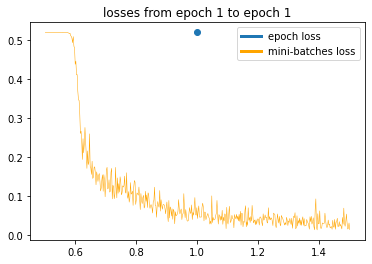

epoch:2/2 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 2 = 0.110


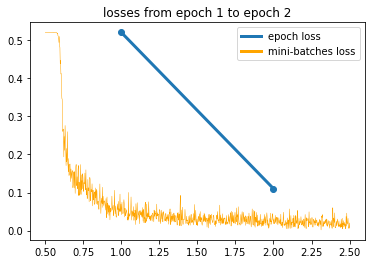

In [6]:
#%% training
 
batch_size = 128
num_epochs = 2
num_classes = 10
hidden_units = 100
 
input_dimensions = (28, 28, 1)
 
# change each label from scaler value to vector( 2 ---> [0, 0, 1, 0, 0, ...] ) (hot one)
Label_Train_hotone = DL.hot_one(Label_Train, num_classes)
 
'''
conv parameters:
Filter_size, num_of_filters, Stride, padding, activation_type
 
pool parameters:
Filter_size, Stride
'''
 
model = DL.model()
model.input_dims(input_dimensions)
 
# LeNet-5
model.add('conv', (5, 5), 6, 1, 0, "Relu")
model.add('maxpool', (2, 2), 2)
model.add('conv', (5, 5), 16, 1, 0, "Relu")
model.add('maxpool', (2, 2), 2)
model.add('flatten')
model.add('Relu', 120)
model.add('Relu', 84)
model.add('Linear', num_classes)
 
# optim = DL.optimizer('gd',0.1, 0.99)
optim = DL.optimizer('adam',0.001)
loss_fn = DL.loss_Function('SoftmaxCrossEntropy')
loss_fn.setLambda(0)
 
model.fit(Features_Train, Label_Train_hotone,
          batch_size, num_epochs, optim, loss_fn)

Accuracy of training dataset = 97.36%
Model Accuracy = 97.43%


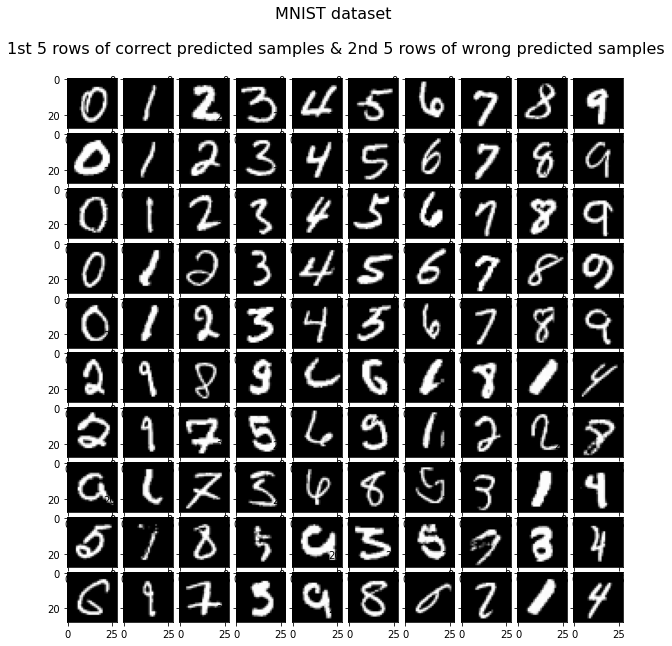

In [7]:
 #%% testing
 
# test on the same trained data set
predicted_labels = np.argmax(model.predict(Features_Train[0:5000]), axis=0)
accuracy = DL.accuracy(predicted_labels, Label_Train)
print("Accuracy of training dataset = {:.2f}%".format(accuracy*100))
 
# test on the test data set
predicted_labels = np.argmax(model.predict(Features_Test), axis=0)
accuracy = DL.accuracy(predicted_labels, Label_Test)
print("Model Accuracy = {:.2f}%".format(accuracy*100))
 
DL.sample_visualization(True, Label_Test, Features_Test, predicted_labels)

In [8]:
 #%% store and load model

DL.store(model, "CNN MNIST model") # store

# model = DL.load("CNN MNIST model") #

#FULLY CONNECTED NN









In [9]:
#%% load dataset
 
# load dataset
# Label_Train, Features_Train, Label_Test, Features_Test = DL.ReadFile("./MNIST")
Label_Train, Features_Train, Label_Test, Features_Test = DL.ReadFile("./CIFAR/cifar-10-batches-py")

Loading data...
data loaded


epoch:1/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 1 = 1.949


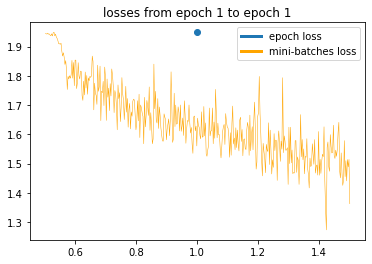

epoch:2/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 2 = 1.732


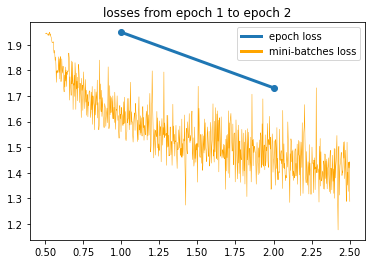

epoch:3/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 3 = 1.645


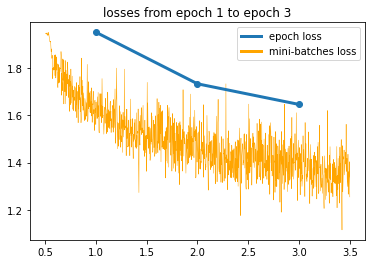

epoch:4/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 4 = 1.589


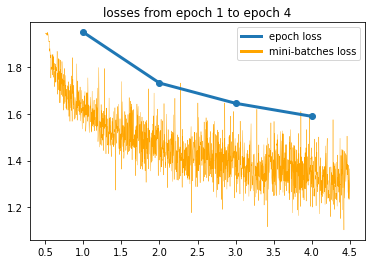

epoch:5/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 5 = 1.549


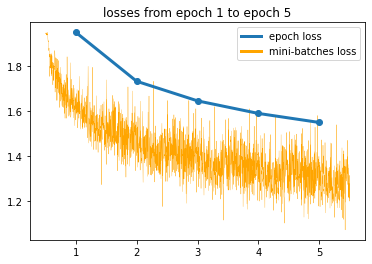

epoch:6/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 6 = 1.518


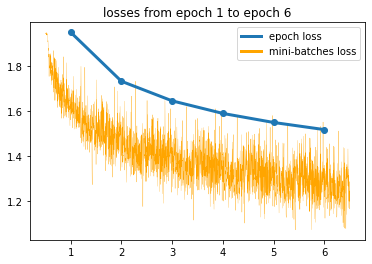

epoch:7/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 7 = 1.490


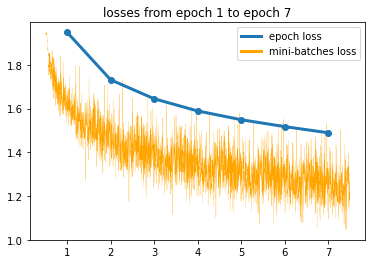

epoch:8/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 8 = 1.465


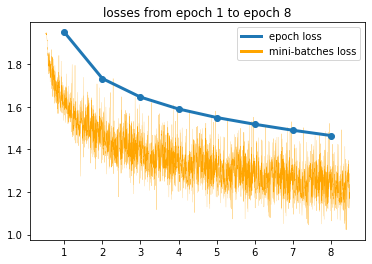

epoch:9/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 9 = 1.446


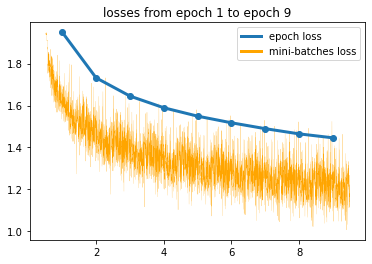

epoch:10/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 10 = 1.428


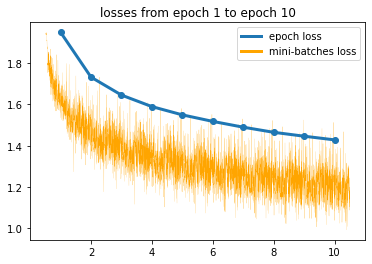

In [19]:
#%% training
batch_size = 128
num_epochs = 10
num_classes = 10
hidden_units = 100

input_dimensions = (32, 32, 3)

# change each label from scaler value to vector( 2 ---> [0, 0, 1, 0, 0, ...] ) (hot one)
Label_Train_hotone = DL.hot_one(Label_Train, num_classes)

model = DL.model()
model.input_dims(input_dimensions)
model.add('flatten')
model.add('Relu', hidden_units)
model.add('Relu', hidden_units)
model.add('Linear', num_classes)
optim = DL.optimizer('gd', 0.5, 0.5)
# optim = DL.optimizer('adam', 0.001)
loss_fn = DL.loss_Function('SoftmaxCrossEntropy')
loss_fn.setLambda(0)

model.fit(Features_Train, Label_Train_hotone,
          batch_size, num_epochs, optim, loss_fn)

Accuracy of training dataset = 49.06%
Model Accuracy = 47.02%


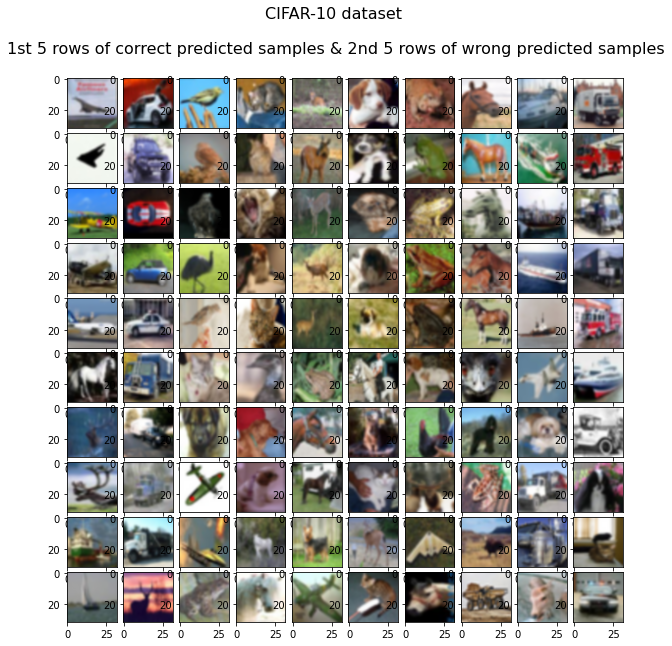

In [20]:
#%% testing

# test on the same trained data set
predicted_labels = np.argmax(model.predict(Features_Train), axis=0)
accuracy = DL.accuracy(predicted_labels, Label_Train)
print("Accuracy of training dataset = {:.2f}%".format(accuracy*100))

# test on the test data set
predicted_labels = np.argmax(model.predict(Features_Test), axis=0)
accuracy = DL.accuracy(predicted_labels, Label_Test)
print("Model Accuracy = {:.2f}%".format(accuracy*100))

DL.sample_visualization(False, Label_Test, Features_Test, predicted_labels)

In [21]:
#%% store and load model

DL.store(model, "FC CIFAR model") # store

# model = DL.load("FC CIFAR model") # load

# FULLY CONNECTED NN (using PCA)

In [22]:
#%% load dataset
 
# load dataset
Label_Train, Features_Train, Label_Test, Features_Test = DL.ReadFile("./MNIST")
#Label_Train, Features_Train, Label_Test, Features_Test = DL.ReadFile("./CIFAR/cifar-10-batches-py")

Loading data...
data loaded


In [23]:
#%% using PCA to reduce dimensions
Features_Train_flattened=Features_Train.reshape(60000,28*28)
Features_Test_flattened=Features_Test.reshape(10000,28*28)
pca=DL.PCA(0.98)
pca.fit(Features_Train_flattened)
Features_Train_reduced = pca.transform(Features_Train_flattened)
Features_Test_reduced = pca.transform(Features_Test_flattened)

epoch:1/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 1 = 0.387


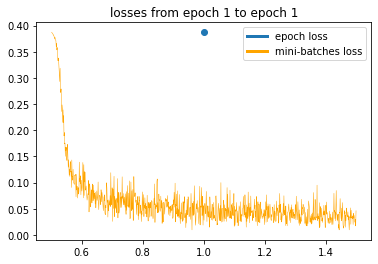

epoch:2/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 2 = 0.164


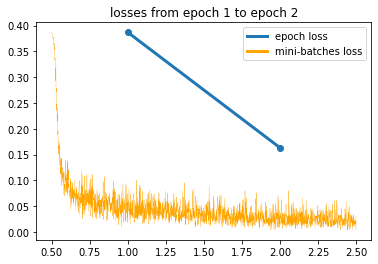

epoch:3/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 3 = 0.113


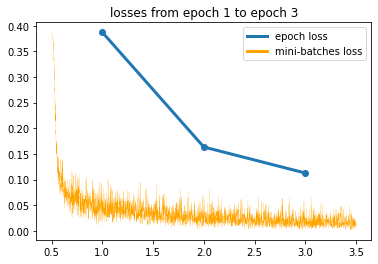

epoch:4/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 4 = 0.087


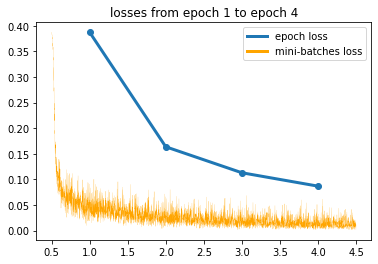

epoch:5/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 5 = 0.071


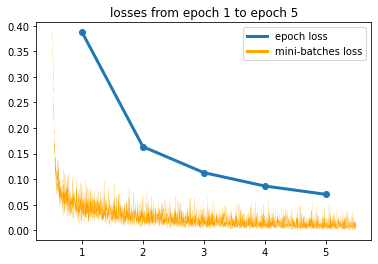

epoch:6/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 6 = 0.059


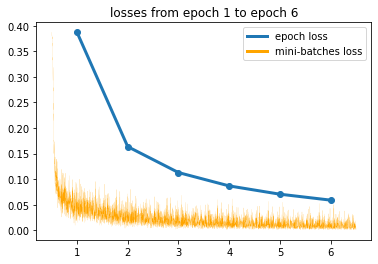

epoch:7/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 7 = 0.050


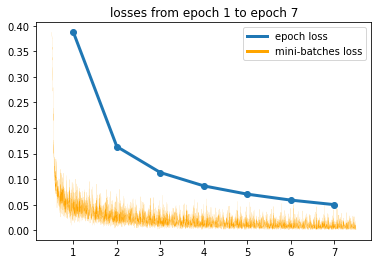

epoch:8/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 8 = 0.043


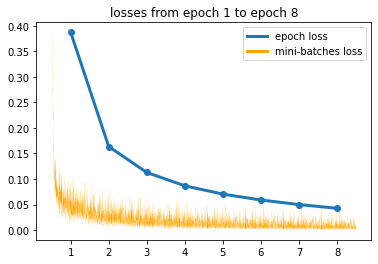

epoch:9/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 9 = 0.037


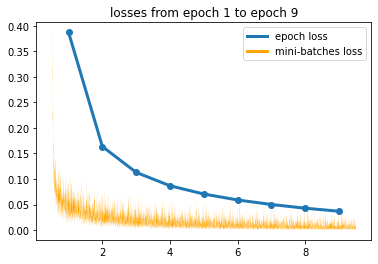

epoch:10/10 [██████████████████████████████████████████████████] 100% ETA:0s			
Loss of epoch 10 = 0.032


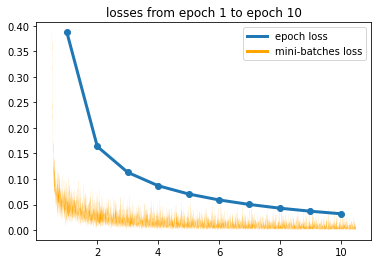

In [24]:
#%% training

batch_size = 64
num_epochs = 10
num_classes = 10
hidden_units = 300

Label_Train_hotone = DL.hot_one(Label_Train, num_classes)
input_dimensions=Features_Train_reduced.shape[0]
model = DL.model()
model.input_dims(input_dimensions)
model.add('Relu', hidden_units)
model.add('Linear', num_classes)
optim = DL.optimizer('gd',0.2,0.2)
loss_fn = DL.loss_Function('SoftmaxCrossEntropy')
loss_fn.setLambda(0)
model.fit(Features_Train_reduced, Label_Train_hotone,batch_size, num_epochs, optim, loss_fn)

Accuracy of training dataset = 99.29%
Model Accuracy = 98.01%


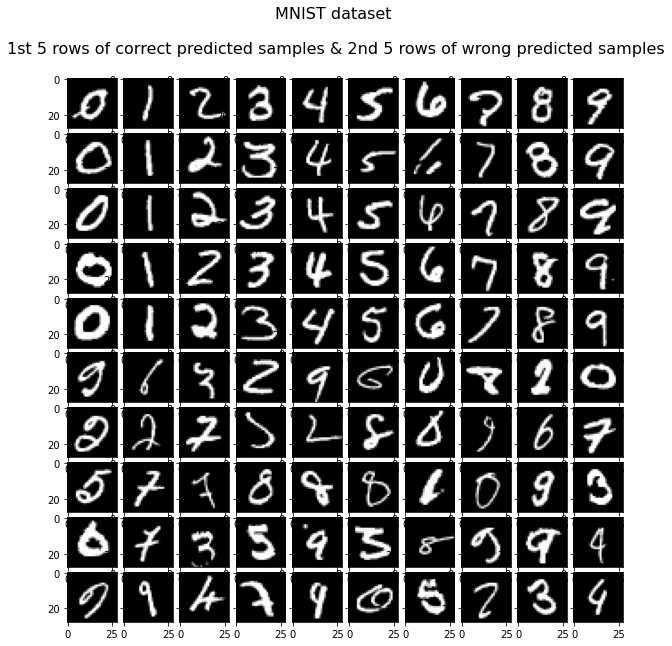

In [25]:
#%% testing

# test on the same trained data
predicted_labels = np.argmax(model.predict((Features_Train_reduced)), axis=0)
accuracy = DL.accuracy(predicted_labels, Label_Train)
print("Accuracy of training dataset = {:.2f}%".format(accuracy*100))

# test on the test data set
Features_Test_reduced = pca.transform(Features_Test_flattened)
predicted_labels = np.argmax(model.predict(Features_Test_reduced), axis=0)
accuracy = DL.accuracy(predicted_labels, Label_Test)
print("Model Accuracy = {:.2f}%".format(accuracy*100))

DL.sample_visualization(True, Label_Test, Features_Test, predicted_labels)

In [26]:
#%% store and load model

DL.store(model, "FC(PCA) MNIST model") # store
# model = DL.load("FC MNIST model") # load